# Weather forecast


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv(r"C:\Users\Downloads\weather.csv")

In [ ]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
data.shape

(366, 22)

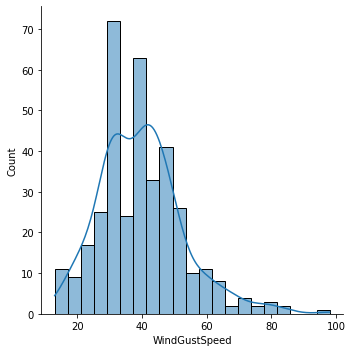

In [ ]:
sns.displot(data['WindGustSpeed'],kde=True)

In [ ]:
data.index

RangeIndex(start=0, stop=366, step=1)

In [ ]:
dataset=data[['Humidity3pm','Pressure3pm','RainTomorrow']]

In [ ]:
dataset.head()

,Humidity3pm,Pressure3pm,RainTomorrow
0,29,1015.0,Yes
1,36,1008.4,Yes
2,69,1007.2,Yes
3,56,1007.0,Yes
4,49,1018.5,No


In [ ]:
import matplotlib.pyplot as plt

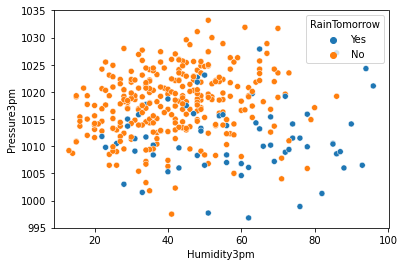

In [ ]:
sns.scatterplot(data=dataset,x="Humidity3pm",y="Pressure3pm",hue="RainTomorrow")
plt.figsize=(15,10)
plt.show()

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

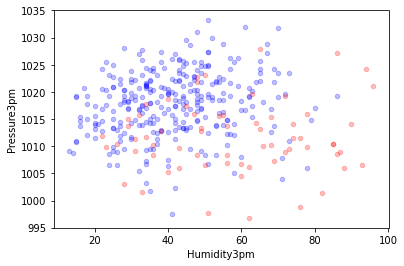

In [ ]:
fig, ax = plt.subplots()
dataset[dataset['RainTomorrow']=='No'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='b',alpha =.25, ax=ax)
dataset[dataset['RainTomorrow']=='Yes'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='r',alpha =.25, ax=ax)

In [ ]:
dataset_clean=dataset.dropna()
len(dataset),len(dataset_clean)

(366, 366)

In [ ]:
x=dataset_clean[['Humidity3pm','Pressure3pm']]
y=dataset_clean['RainTomorrow']
y= np.array([0 if value=='No' else 1 for value in y])

In [ ]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
print(len(y_train))
print(len(y_test))

274
92


random_state reproduce something again and again

In [ ]:
x_train.iloc[0]

Humidity3pm      33.0
Pressure3pm    1019.1
Name: 155, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier()
neigh.fit(x_train,y_train)
y_pred=neigh.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8369565217391305